# Selling Price Prediction for a Car

The columns in the given dataset is as follows:

selling_price will be our target variable since we are predicting the price of vehicles.

name: Name and model of vehicle, I think the brand of the car will be somewhat valuable, since most of us do care about our car's brand, don't we?

year: The year when the vehicle is bought, I assume it will tell us more information if we convert it to another feature called 
'age' by deducting the 'year' by year of now(2021). I also assume older vehicle should be cheaper.

km_driven: This can indirectly tell us the condition of the vehicle, vehicle which travelled a longer distance tends to mean the vehicle is older and hence the selling price will be lower.

fuel: Diesel vs petrol should make a difference since the price of the fuel and the engine type are not the same.

seller_type: I assume selling price of vehicle for 'Individual seller' should be lower since 'Dealer' often charge commission or service fee or any form of fees.

transmission: I assume 'Manual' car should be cheaper than 'Automatic' vehicle, as of my experience.

owner: This specify the number of owners the vehicle had before, I assume the more owners the vehicle had before, the cheaper the vehicle will be.

mileage: This is the fuel efficiency metric, I assume higher mileage vehicle should be higher in selling_price.
engine: The Cubic Capacity(CC) of engine, I assume higher CC vehicle should be higher in selling_price.

max_power: The Brake Horse Power(BHP) of the vehicle, I assume higher BHP should be higher in selling_price.

torque: The torque of the vehicle, for modelling purpose, this does not contain much information since they are rated at different rpm, so I will drop this feature.

seats: Seats can possibly represent the size of the vehicle, I assume the vehicle with more seats will be higher in selling price.

In [449]:
#Loading Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import warnings
warnings.simplefilter(action='ignore')

In [450]:
#reading the data
df=pd.read_csv(r"C:\Users\DELL\Desktop\AyushManu\DataVader\Assignments\Linear Regression\Car SP Prediction\Car details v3.csv")

In [451]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [452]:
#finding duplicates
sum(df.duplicated())

1202

In [453]:
#dropping duplicates
df=df.drop_duplicates()

In [454]:
df.info()
# 13 columns and 6926 entries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6926 entries, 0 to 8125
Data columns (total 13 columns):
name             6926 non-null object
year             6926 non-null int64
selling_price    6926 non-null int64
km_driven        6926 non-null int64
fuel             6926 non-null object
seller_type      6926 non-null object
transmission     6926 non-null object
owner            6926 non-null object
mileage          6718 non-null object
engine           6718 non-null object
max_power        6721 non-null object
torque           6717 non-null object
seats            6718 non-null float64
dtypes: float64(1), int64(3), object(9)
memory usage: 757.5+ KB


In [455]:
# creating list of categorical variables
cat_bool=df.dtypes=='object'
cat_var = list(cat_bool[cat_bool].index)
cat_var

['name',
 'fuel',
 'seller_type',
 'transmission',
 'owner',
 'mileage',
 'engine',
 'max_power',
 'torque']

In [456]:
#creating list of numerical variables
num_bool=df.dtypes!='object'
num_var = list(num_bool[num_bool].index)
print(num_var)

['year', 'selling_price', 'km_driven', 'seats']


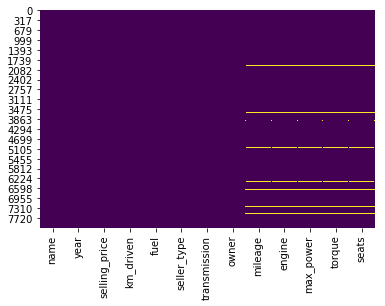

In [457]:
#checking missing values in the dataset visually
sns.heatmap(df.isnull(),cbar=False, cmap='viridis')

In [458]:
# Checking for missing values by count
df.isnull().sum()
# low proportion of missing values when compared to total row(~7000), hence droping missing value rows

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          208
engine           208
max_power        205
torque           209
seats            208
dtype: int64

In [459]:
df.dropna(axis=0, inplace = True)

In [460]:
df.describe().transpose()
# average selling price 526385, but max is 10000000
# average km driven 73398 but max is 2360457
# above insights show presence of outliers
# Median is less than mean for selling price, distibution is positively skewed.

,count,mean,std,min,25%,50%,75%,max
year,6717.0,2013.611136,3.897402,1994.0,2011.0,2014.0,2017.0,2020.0
selling_price,6717.0,526385.997022,523550.448297,29999.0,250000.0,420000.0,650000.0,10000000.0
km_driven,6717.0,73398.337651,58703.275270,1.0,38000.0,68203.0,100000.0,2360457.0
seats,6717.0,5.434271,0.983805,2.0,5.0,5.0,5.0,14.0


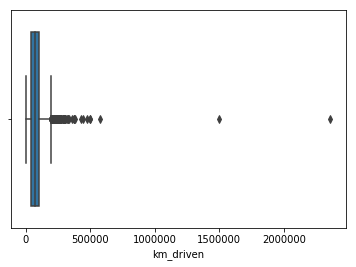

In [461]:
sns.boxplot(df['km_driven'])

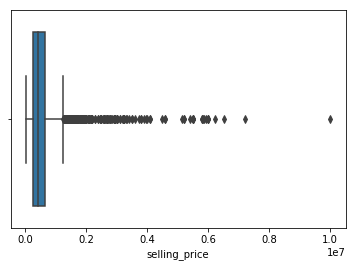

In [462]:
sns.boxplot(df['selling_price'])

In [463]:
df.describe(include=np.object).transpose()
#most seller type individual
#most transmission is manual
# most type of fuel is diesel
#most type of owner is 'first owner'
# lot of different values in mileage,engine,max_power, torque

,count,unique,top,freq
name,6717,1982,Maruti Swift Dzire VDI,118
fuel,6717,4,Diesel,3658
seller_type,6717,3,Individual,6024
transmission,6717,2,Manual,6142
owner,6717,5,First Owner,4176
mileage,6717,393,18.9 kmpl,210
engine,6717,121,1248 CC,907
max_power,6717,320,74 bhp,324
torque,6717,441,190Nm@ 2000rpm,472


In [464]:
# Finding count of different entries for low unique value categorical columns
cols=['fuel','seller_type','transmission','owner']
for c in cols:
    print(df[c].value_counts(),'\n')

Diesel    3658
Petrol    2973
CNG         51
LPG         35
Name: fuel, dtype: int64 

Individual          6024
Dealer               666
Trustmark Dealer      27
Name: seller_type, dtype: int64 

Manual       6142
Automatic     575
Name: transmission, dtype: int64 

First Owner             4176
Second Owner            1888
Third Owner              493
Fourth & Above Owner     155
Test Drive Car             5
Name: owner, dtype: int64 



# Data Cleaning

In [465]:
df['torque'].value_counts()

190Nm@ 2000rpm                 472
200Nm@ 1750rpm                 398
90Nm@ 3500rpm                  353
62Nm@ 3000rpm                  160
114Nm@ 4000rpm                 156
113Nm@ 4200rpm                 139
69Nm@ 3500rpm                  131
160Nm@ 2000rpm                 131
330Nm@ 1600-2800rpm            114
74.5Nm@ 4000rpm                111
59Nm@ 2500rpm                  107
195Nm@ 1400-2200rpm             94
219.7Nm@ 1500-2750rpm           88
114.7Nm@ 4000rpm                85
20.4@ 1400-3400(kgm@ rpm)       77
290Nm@ 1800-2800rpm             74
114Nm@ 3500rpm                  71
72Nm@ 4386rpm                   70
250Nm@ 1500-2500rpm             70
259.9Nm@ 1900-2750rpm           68
115Nm@ 4000rpm                  66
113.75nm@ 4000rpm               65
320Nm@ 1700-2700rpm             64
140Nm@ 1800-3000rpm             61
205Nm@ 1750-3250rpm             60
259.8Nm@ 1900-2750rpm           60
240Nm@ 1600-2800rpm             58
99.04Nm@ 4500rpm                53
145Nm@ 4600rpm      

In [466]:
# as the torque variable contains many different values, dropping it fromthe dataset, not productive to create label or one hot encoding
df.drop('torque',axis=1,inplace = True)

In [467]:
df['Age']=2021-df['year']#adding age column
df.drop('year',axis=1,inplace=True)#dropping the year column

In [468]:
#converting owner col into numerical format
df['owner']=df['owner'].replace({'First Owner':1,'Second Owner':2,'Third Owner':3,'Fourth & Above Owner':4,'Test Drive Car':5})

In [469]:
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Age
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,5.0,7
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,5.0,7
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,5.0,15
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,5.0,11
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,5.0,14


In [470]:
#removing string terms from values in order to convert them to numreric
df['mileage']=df['mileage'].str.replace(' kmpl',"").str.strip('km/kg')

In [471]:
df['engine']=df['engine'].str.strip('CC')

In [472]:
df['max_power']=df['max_power'].str.strip('bhp')

In [473]:
# coverting to numerical variables
col_list=['mileage','engine','max_power','owner']
for col in col_list:
    df[col]=pd.to_numeric(df[col])

In [474]:
df['seats'].value_counts()

5.0     5254
7.0      966
8.0      221
4.0      124
9.0       74
6.0       57
10.0      18
2.0        2
14.0       1
Name: seats, dtype: int64

In [475]:
#seats column contain fixed no of categories, hence converting it into the string column
df['seats']=df['seats'].astype(str)

# EDA (Exploratory Data Analysis)

<Figure size 1440x864 with 0 Axes>

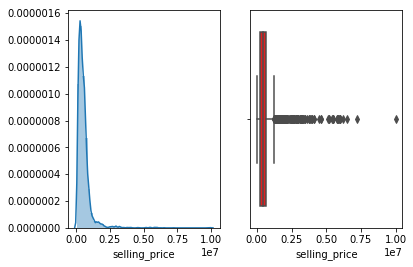

In [476]:
plt.figure(figsize=(20,12))
fig, axs = plt.subplots(ncols=2)
sns.distplot(df['selling_price'], ax=axs[0])
sns.boxplot(df['selling_price'], ax=axs[1],color='red')


<Figure size 864x576 with 0 Axes>

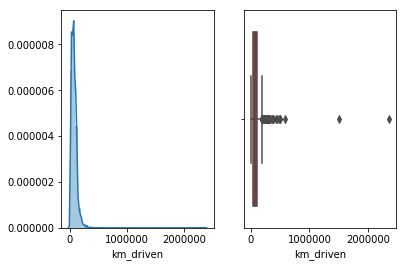

In [477]:
plt.figure(figsize=(12,8))
fig, axs = plt.subplots(ncols=2)
sns.distplot(df['km_driven'], ax=axs[0])
sns.boxplot(df['km_driven'], ax=axs[1],color='red')


<Figure size 1440x864 with 0 Axes>

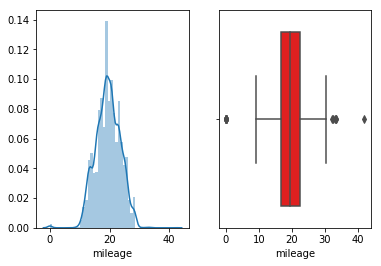

In [478]:
plt.figure(figsize=(20,12))
fig, axs = plt.subplots(ncols=2)
sns.distplot(df['mileage'], ax=axs[0])
sns.boxplot(df['mileage'], ax=axs[1],color='red')


In [479]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

4.14.3


In [480]:
import cufflinks as cf

In [481]:
# For Notebooks
init_notebook_mode(connected=True)

In [482]:
# For offline use
cf.go_offline()

In [483]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
selling_price,6717.0,526385.997022,523550.448297,29999.0,250000.0,420000.00,650000.0,10000000.0
km_driven,6717.0,73398.337651,58703.275270,1.0,38000.0,68203.00,100000.0,2360457.0
owner,6717.0,1.500074,0.737740,1.0,1.0,1.00,2.0,5.0
mileage,6717.0,19.466585,4.048102,0.0,16.8,19.44,22.5,42.0
engine,6717.0,1430.985857,493.469198,624.0,1197.0,1248.00,1498.0,3604.0
max_power,6717.0,87.766100,31.724555,32.8,67.1,81.83,100.0,400.0
Age,6717.0,7.388864,3.897402,1.0,4.0,7.00,10.0,27.0


In [484]:
plt.figure(figsize=(10,6))
df['selling_price'].iplot(kind='hist',subplots=True, subplot_titles=True)
df['selling_price'].iplot(kind='box',subplots=True, subplot_titles=True)

<Figure size 720x432 with 0 Axes>

In [485]:
df[df['km_driven']>300000]['name'].count()

18

In [486]:
plt.figure(figsize=(10,6))
df['km_driven'].iplot(kind='hist',subplots=True, subplot_titles=True)
df['km_driven'].iplot(kind='box',subplots=True, subplot_titles=True)

<Figure size 720x432 with 0 Axes>

In [487]:
plt.figure(figsize=(10,6))
df['mileage'].iplot(kind='hist',subplots=True, subplot_titles=True)
df['mileage'].iplot(kind='box',subplots=True, subplot_titles=True)

<Figure size 720x432 with 0 Axes>

In [488]:
fig = make_subplots(rows=1, cols=2,subplot_titles=("Histogram of engine", 
                                                   "Boxplot engine",))
fig.add_trace(go.Histogram(x=df['engine'], name="cc"),row=1, col=1)
fig.add_trace(go.Box(x=df['engine'], name="cc"),row=1, col=2)

fig.show()

In [489]:
fig = make_subplots(rows=1, cols=2,subplot_titles=("Histogram of max_power", 
                                                   "Boxplot max_power",))
fig.add_trace(go.Histogram(x=df['max_power'], name="bhp"),row=1, col=1)
fig.add_trace(go.Box(x=df['max_power'], name="bhp"),row=1, col=2)

fig.show()

In [490]:
fig = make_subplots(rows=1, cols=2,subplot_titles=("Histogram of age", 
                                                   "Boxplot age",))
fig.add_trace(go.Histogram(x=df['Age'], name="years"),row=1, col=1)
fig.add_trace(go.Box(x=df['Age'], name="years"),row=1, col=2)

fig.show()

In [491]:
df['fuel'].value_counts().iplot(kind='bar')

In [492]:
df['seller_type'].value_counts().iplot(kind='bar')

In [493]:
df['owner'].value_counts().iplot(kind='bar')

In [494]:
df['transmission'].value_counts().iplot(kind='bar')

In [495]:
df['seats'].value_counts().iplot(kind='bar')

# Bivariate/MultiVariate Analysis

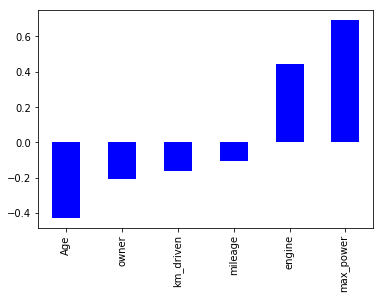

In [496]:
df.corr()['selling_price'].drop('selling_price').sort_values().plot(kind='bar',color='blue')

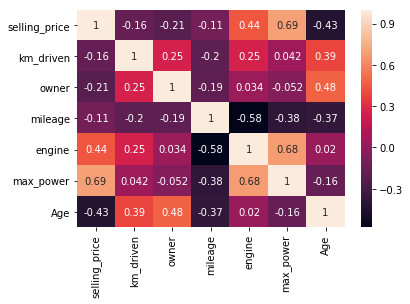

In [497]:
sns.heatmap(df.corr(),annot=True)

In [498]:
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Age
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,1,23.40,1248,74.00,5.0,7
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,2,21.14,1498,103.52,5.0,7
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,3,17.70,1497,78.00,5.0,15
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,1,23.00,1396,90.00,5.0,11
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,1,16.10,1298,88.20,5.0,14


In [500]:
df.to_csv('car_dataprocessed_.csv',index=False)

# Model Building - Multiple Linear Regression

In [501]:
data_final = pd.read_csv('car_dataprocessed.csv')

In [502]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [525]:
def create_model(model, X_train,y_train, X_test,y_test):
    
    model.fit(X_train, y_train)
    
    #training data
    y_train_pred = model.predict(X_train)
    r2_train = r2_score(y_train,y_train_pred)
    print('r2 score for training', r2_train)
    
    #test data
    y_test_pred = model.predict(X_test)
    r2_test = r2_score(y_test,y_test_pred)
    print('r2 score for test', r2_test)
    
    cv_training = cross_val_score(model, X_train, y_train, cv=5)
    print('training cross validation scores', cv_training)
    
    cv_mean_training = cv_training.mean()
    print('Average cross validaiton score', cv_mean_training)
    
#     diff = pd.DataFrame((y_train - y_train_pred).values)
#     sns.distplot(diff)
    
    sns.(x=y_test,y=y_test_pred)

In [504]:
X= data_final.drop(['selling_price','name'],axis=1)
y=df['selling_price']

In [505]:
from sklearn.model_selection import train_test_split

In [506]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [507]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5373, 10)
(1344, 10)
(5373,)
(1344,)


In [508]:
from sklearn.linear_model import LinearRegression

In [509]:
lm= LinearRegression()

r2 score for training 0.4775199987520724
r2 score for test 0.4843883163737397
training cross validation scores [0.49738647 0.43244638 0.46574585 0.48782825 0.48042811]
Average cross validaiton score 0.47276701336832083


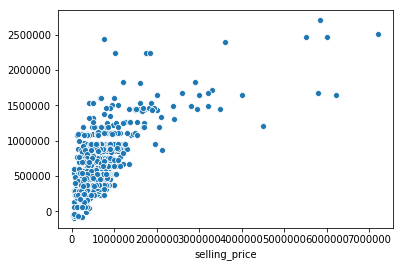

In [510]:
create_model(lm,X_train[['max_power']],y_train,X_test[['max_power']],y_test)

In [511]:
df_model=df.copy()

In [512]:
df_model.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Age
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,1,23.40,1248,74.00,5.0,7
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,2,21.14,1498,103.52,5.0,7
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,3,17.70,1497,78.00,5.0,15
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,1,23.00,1396,90.00,5.0,11
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,1,16.10,1298,88.20,5.0,14


In [513]:
df_model['brand']=df['name'].str.split(' ').str.get(0)

In [514]:
df_model.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Age,brand
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,1,23.40,1248,74.00,5.0,7,Maruti
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,2,21.14,1498,103.52,5.0,7,Skoda
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,3,17.70,1497,78.00,5.0,15,Honda
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,1,23.00,1396,90.00,5.0,11,Hyundai
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,1,16.10,1298,88.20,5.0,14,Maruti


In [515]:
df_model['brand'].nunique()

31

In [516]:
df_model.describe(include='object').transpose()

,count,unique,top,freq
name,6717,1982,Maruti Swift Dzire VDI,118
fuel,6717,4,Diesel,3658
seller_type,6717,3,Individual,6024
transmission,6717,2,Manual,6142
seats,6717,9,5.0,5254
brand,6717,31,Maruti,2089


In [517]:
df_model.drop(['name'],axis=1,inplace=True)

# Filter the outlier and log-transform the target variable('selling_price')
df_model = df_model[df_model['selling_price'] < 2500000]
df_model['selling_price'] = np.log(df_model['selling_price'])

# Filter the outlier in 'km_driven' feature
df_model = df_model[df_model['km_driven'] < 300000]

# Filter the unwanted rows in 'fuel' feature
df_model = df_model[~df_model['fuel'].isin(['CNG','LPG'])]

# Filter the outliers in 'mileage' feature
df_model = df_model[(df_model['mileage'] > 5) & (df_model['mileage'] < 35)]

# Filter the outlier in 'max_power' feature and log-transform the data.
df_model = df_model[df_model['max_power'] < 300]
df_model['max_power'] = np.log(df_model['max_power'])

# Log-transform the 'age' feature data.
df_model['Age'] = np.log(df_model['Age'])

In [518]:
df_model=pd.get_dummies(data=df_model, drop_first=True)

In [519]:
X = df_model.drop(['selling_price'],axis=1)
y = df_model['selling_price']

In [520]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [521]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [522]:
num_var = ['km_driven','owner','mileage','engine','max_power','Age']

In [523]:
X_train[num_var] = scaler.fit_transform(X_train[num_var])
X_test[num_var] = scaler.transform(X_test[num_var])

In [526]:
create_model(lm, X_train, y_train, X_test, y_test)

r2 score for training 0.8560620418533496
r2 score for test 0.853151094864102
training cross validation scores [0.85684275 0.84834677 0.85283797 0.86353878 0.8388678 ]
Average cross validaiton score 0.8520868149341586


TypeError: lmplot() missing 1 required positional argument: 'data'